In [7]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

#imports for pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, ConfusionMatrixDisplay


In [2]:
austin = pd.read_csv('aac_intakes_outcomes.csv')

#Filter Austin dataframe
austin = austin[['intake_type', 'color', 'sex_upon_intake', 'animal_type', 'breed', 'time_in_shelter_days', 'intake_condition', 'found_location', 'age_upon_intake_(years)', 'age_upon_outcome_(years)', 'outcome_type']]

#Check data types of each column
austin.dtypes

#The columns containing information about time and age are floats, which is what we want for numerical analysis.

#Create a binary variable to code whether or not the animal was adopted
austin['adoption_indicator'] = austin['outcome_type'].apply(lambda x: 1 if x in ['Adoption', 'Return to Owner', 'Rto-Adopt',] else 0)

#Take a look at the cleaned dataset
austin.head()

,intake_type,color,sex_upon_intake,animal_type,breed,time_in_shelter_days,intake_condition,found_location,age_upon_intake_(years),age_upon_outcome_(years),outcome_type,adoption_indicator
0,Stray,Yellow/White,Neutered Male,Dog,Spinone Italiano Mix,0.588194,Normal,Colony Creek And Hunters Trace in Austin (TX),10.0,10.0,Return to Owner,1
1,Public Assist,Yellow/White,Neutered Male,Dog,Spinone Italiano Mix,1.259722,Normal,8700 Research Blvd in Austin (TX),7.0,7.0,Return to Owner,1
2,Public Assist,Yellow/White,Neutered Male,Dog,Spinone Italiano Mix,1.113889,Normal,8700 Research in Austin (TX),6.0,6.0,Return to Owner,1
3,Owner Surrender,Tricolor,Neutered Male,Dog,Dachshund,4.970139,Normal,Austin (TX),10.0,10.0,Transfer,0
4,Public Assist,Brown/White,Neutered Male,Dog,Shetland Sheepdog,0.119444,Injured,12034 Research Blvd in Austin (TX),16.0,16.0,Return to Owner,1


In [12]:
austin['sex_upon_intake'].value_counts()
#austin['animal_type'].value_counts()

animal_type
Dog      45366
Cat      29539
Other     4428
Bird       339
Name: count, dtype: int64

In [8]:

#austin_1st is a dataframe using only columns that are independent or dependent variables
austin_1st = austin[['adoption_indicator','intake_type','sex_upon_intake','animal_type','age_upon_outcome_(years)','time_in_shelter_days']]
X = austin_1st.drop('adoption_indicator', axis=1)  
y = austin_1st['adoption_indicator']  

# Define categorical and numeric columns
categorical_cols = ['intake_type', 'sex_upon_intake', 'animal_type']
numeric_cols = ['age_upon_intake_(years)','age_upon_outcome_(years)','time_in_shelter_days']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# Create pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(categories='auto', sparse=False), categorical_cols),
        ('standardize', StandardScaler(), numeric_cols),
    ]
)

pipeline_randomforest = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

# Fit the model
pipeline_randomforest.fit(X_train, y_train)

# Get one-hot-encoded feature names after transformation
one_hot_encoded_feature_names = list(pipeline_randomforest.named_steps['preprocessor']
                                      .named_transformers_['one_hot']
                                      .get_feature_names(input_features=categorical_cols))

# Combine the one-hot-encoded feature names with numeric column names
all_feature_names = one_hot_encoded_feature_names + numeric_cols

# Get predictions on the test set
predictions = pipeline_randomforest.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nAccuracy Score:", accuracy_score(y_test, predictions))

# Get feature importances from the trained RandomForest model
feature_importances = pipeline_randomforest.named_steps['classifier'].feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances:")
print(importances_df)

mae = mean_absolute_error(y_test, predictions)
#r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
#print(f"R-squared score: {r2}")

Confusion Matrix:
 [[ 6542  2851]
 [ 2570 11939]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71      9393
           1       0.81      0.82      0.81     14509

    accuracy                           0.77     23902
   macro avg       0.76      0.76      0.76     23902
weighted avg       0.77      0.77      0.77     23902


Accuracy Score: 0.7731988954899172

Feature Importances:
                           Feature  Importance
17            time_in_shelter_days    0.611252
16        age_upon_outcome_(years)    0.117456
15         age_upon_intake_(years)    0.065439
9          sex_upon_intake_Unknown    0.045643
13                 animal_type_Dog    0.044916
12                 animal_type_Cat    0.022230
14               animal_type_Other    0.018769
1      intake_type_Owner Surrender    0.012198
4             intake_type_Wildlife    0.011443
3                intake_type_Stray    0.010599
8    sex_upon_intake_Sp

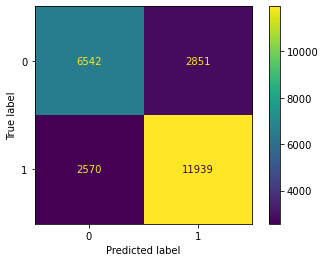

In [10]:
cm = confusion_matrix(y_test, predictions, labels=pipeline_randomforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=pipeline_randomforest.classes_)
disp.plot()





In [ ]:
#austin_1st is a dataframe using only columns that are independent or dependent variables
austin_1st = austin[['adoption_indicator','intake_type','sex_upon_intake','animal_type','age_upon_intake_(years)','age_upon_outcome_(years)','time_in_shelter_days']]
X = austin_1st.drop('adoption_indicator', axis=1)  
y = austin_1st['adoption_indicator']  

# Define categorical and numeric columns
categorical_cols = ['intake_type', 'sex_upon_intake', 'animal_type']
numeric_cols = ['age_upon_intake_(years)','age_upon_outcome_(years)','time_in_shelter_days']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# Create pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(categories='auto', sparse=False), categorical_cols),
        ('standardize', StandardScaler(), numeric_cols),
    ]
)

pipeline_randomforest = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest Classifier
])

# Fit the model
pipeline_randomforest.fit(X_train, y_train)

# Get one-hot-encoded feature names after transformation
one_hot_encoded_feature_names = list(pipeline_randomforest.named_steps['preprocessor']
                                      .named_transformers_['one_hot']
                                      .get_feature_names(input_features=categorical_cols))

# Combine the one-hot-encoded feature names with numeric column names
all_feature_names = one_hot_encoded_feature_names + numeric_cols

# Get predictions on the test set
predictions = pipeline_randomforest.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nAccuracy Score:", accuracy_score(y_test, predictions))

# Get feature importances from the trained RandomForest model
feature_importances = pipeline_randomforest.named_steps['classifier'].feature_importances_

# Create a DataFrame to display feature importances
importances_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("\nFeature Importances:")
print(importances_df)

mae = mean_absolute_error(y_test, predictions)
#r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
#print(f"R-squared score: {r2}")

In [13]:
! git add .

fatal: not a git repository (or any parent up to mount point /home)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
